In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：8，动作空间维度：4
开始训练！
回合：20/600，奖励：-155.03，评估奖励：-201.36，最佳评估奖励：-201.36，更新模型！ 0.07
回合：40/600，奖励：-380.53，评估奖励：-205.44，最佳评估奖励：-201.36，0.05
回合：60/600，奖励：-104.51，评估奖励：-274.17，最佳评估奖励：-201.36，0.05
回合：80/600，奖励：-183.50，评估奖励：-171.96，最佳评估奖励：-171.96，更新模型！ 0.05
回合：100/600，奖励：-185.26，评估奖励：-212.63，最佳评估奖励：-171.96，0.05
回合：120/600，奖励：-76.27，评估奖励：-267.30，最佳评估奖励：-171.96，0.05
回合：140/600，奖励：-330.63，评估奖励：-242.99，最佳评估奖励：-171.96，0.05
回合：160/600，奖励：-38.92，评估奖励：-187.16，最佳评估奖励：-171.96，0.05
回合：180/600，奖励：-149.95，评估奖励：-206.07，最佳评估奖励：-171.96，0.05
回合：200/600，奖励：-146.42，评估奖励：-300.87，最佳评估奖励：-171.96，0.05
回合：220/600，奖励：-255.78，评估奖励：-264.43，最佳评估奖励：-171.96，0.05
回合：240/600，奖励：-100.07，评估奖励：-119.81，最佳评估奖励：-119.81，更新模型！ 0.05
回合：260/600，奖励：-333.16，评估奖励：-202.34，最佳评估奖励：-119.81，0.05
回合：280/600，奖励：-194.77，评估奖励：-173.37，最佳评估奖励：-119.81，0.05
回合：300/600，奖励：-150.87，评估奖励：-147.33，最佳评估奖励：-119.81，0.05
回合：320/600，奖励：-115.98，评估奖励：-200.65，最佳评估奖励：-119.81，0.05
回合：340/600，奖励：-201.95，评估奖励：-307.67，最佳评估奖励：-119.81，0.05
回合：360/600，奖励：-94.86，评估奖励：-87

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：2/20，奖励：-95.05
回合：3/20，奖励：-186.73
回合：4/20，奖励：-67.96
回合：5/20，奖励：-266.93
回合：6/20，奖励：-100.90
回合：7/20，奖励：-161.68
回合：8/20，奖励：-130.60
回合：9/20，奖励：-121.55
回合：10/20，奖励：-92.99
回合：11/20，奖励：-159.92
回合：12/20，奖励：-205.57
回合：13/20，奖励：-81.11
回合：14/20，奖励：-77.12
回合：15/20，奖励：-114.24
回合：16/20，奖励：-95.32
回合：17/20，奖励：-60.05
回合：18/20，奖励：-223.32
回合：19/20，奖励：-173.46
回合：20/20，奖励：-251.62
完成测试


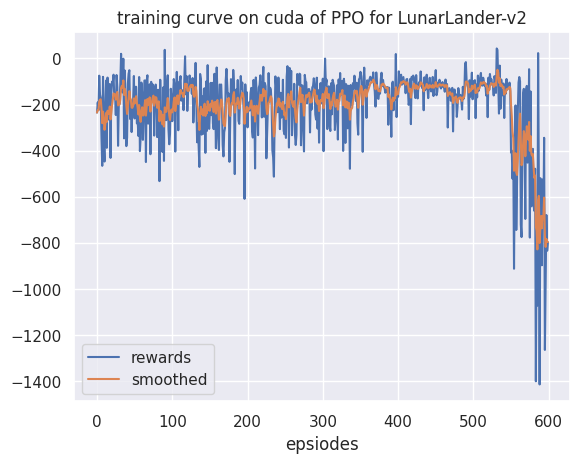

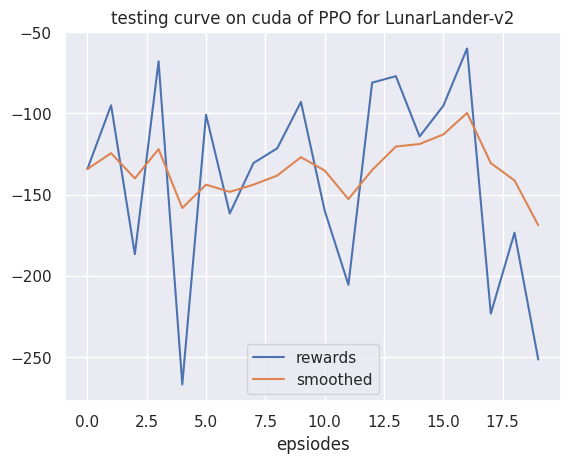

In [2]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

1 tensor(-76.8347) tensor([0.2549, 0.2346, 0.2735, 0.2369])
0 tensor(-77.5440) tensor([0.2547, 0.2332, 0.2744, 0.2377])
0 tensor(-77.8760) tensor([0.2548, 0.2339, 0.2741, 0.2372])
2 tensor(-78.1928) tensor([0.2549, 0.2346, 0.2736, 0.2369])
3 tensor(-78.1755) tensor([0.2549, 0.2346, 0.2736, 0.2369])
0 tensor(-78.0970) tensor([0.2543, 0.2380, 0.2718, 0.2359])
0 tensor(-78.3664) tensor([0.2539, 0.2393, 0.2712, 0.2355])
1 tensor(-78.6204) tensor([0.2526, 0.2431, 0.2699, 0.2345])
3 tensor(-79.3691) tensor([0.2544, 0.2375, 0.2721, 0.2361])
1 tensor(-79.2336) tensor([0.2513, 0.2468, 0.2685, 0.2334])
2 tensor(-79.8794) tensor([0.2540, 0.2390, 0.2714, 0.2356])
0 tensor(-79.3615) tensor([0.2541, 0.2386, 0.2715, 0.2357])
0 tensor(-79.5865) tensor([0.2534, 0.2408, 0.2707, 0.2351])
2 tensor(-79.7958) tensor([0.2523, 0.2439, 0.2696, 0.2342])
1 tensor(-79.6412) tensor([0.2520, 0.2448, 0.2692, 0.2340])
1 tensor(-80.3115) tensor([0.2543, 0.2378, 0.2719, 0.2360])
2 tensor(-80.9029) tensor([0.2549, 0.235

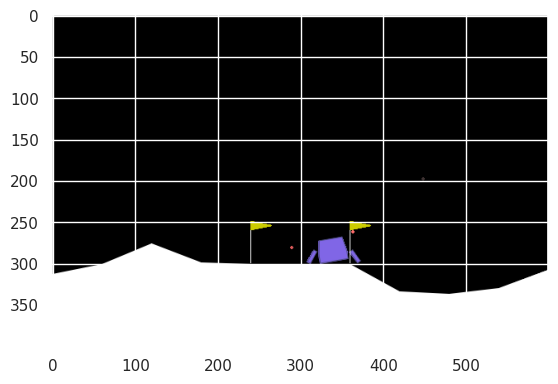

In [3]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


tensor([[[[1.1044e-18, 1.9188e-17, 5.0805e-15, 5.5624e-20, 2.2523e-20,
           2.0895e-18, 1.2500e-01, 1.0559e-17]]]], grad_fn=<ToCopyBackward0>)

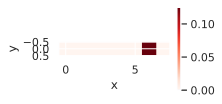

In [6]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [7]:
torch.save(best_agent, './Data/LunarLander-v2-StateAttention-None/Ex3.pt')